In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Bootcamp/DIO - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Bootcamp/DIO - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Bootcamp/DIO - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Bootcamp/DIO - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Bootcamp/DIO - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [ ]:
# Concatenar Dados
# sheet_name - nome da aba que deve ser lida
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# Dados amostrais aleatórios
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
4,Aracaju,2018-01-01,24.51,1522,8
182,Natal,2019-01-02,6.60,1037,2
30,Recife,2019-01-01,12.35,980,5
135,Natal,2019-01-02,9.95,1037,3
36,Aracaju,2018-01-01,37.99,1523,8


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
# Alterar tipo de dado 
df["LojaID"] = df["LojaID"].astype('object')

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
# Verificar numeros vazios
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Subistitui valores nulos pela media
df["Vendas"].fillna(df["Vendas"].mean(),inplace = True)

In [ ]:
# Subisituir por 0
df["Vendas"].fillna(0,inplace = True)

In [ ]:
# Remover linas zeradas
df.dropna(inplace = True)

In [ ]:
# Valor faltates na coluna vendas
df.dropna(subset=["Vendas"],inplace = True)

In [ ]:
# Falor faltante em todas as colunas
df.dropna(how="all",inplace = True)

In [ ]:
# Criar colunas
df["Receita"] = df["Vendas"]*df["Qtde"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df.max()

Cidade                Salvador
Data       2019-04-05 00:00:00
Vendas                   886.0
LojaID                    1523
Qtde                        10
Receita                 3544.0
dtype: object

In [ ]:
# Retorna as 3 melhores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
# Rerotas as 3 piores receitas 
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenar valores
df.sort_values("Receita",ascending=False).head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:
# Converter e datetime
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
# Agrupar receita 
df.groupby(df["Data"].dt.year)["Receita"].sum()


Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criar coluna com ano 
df["Ano"] = df["Data"].dt.year

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [ ]:
df = df.drop(["mes_vendda","dia_venda","Diferenca_dias","trimeste_vendas","mes_venda"], axis=1)

In [ ]:
df.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano
37,Fortaleza,2019-01-01,35.86,1002,6,215.16,2019
77,Fortaleza,2019-01-01,167.64,1005,1,167.64,2019
73,Aracaju,2018-01-01,159.78,1521,3,479.34,2018
207,Salvador,2019-01-02,46.70,1036,2,93.40,2019
37,Natal,2018-10-03,726.00,852,2,1452.00,2018
129,Natal,2019-01-02,125.66,1037,1,125.66,2019
12,Recife,2019-01-01,17.48,982,2,34.96,2019
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019
94,Salvador,2019-01-01,33.24,1037,1,33.24,2019
164,Salvador,2019-01-02,6.59,1035,1,6.59,2019


In [ ]:
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)

In [ ]:
df.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_venda,dia_venda
224,Natal,2019-01-02,178.30,1035,3,534.90,2019,1,2
140,Recife,2019-03-02,166.89,983,5,834.45,2019,3,2
190,Salvador,2019-01-02,78.78,1035,3,236.34,2019,1,2
91,Recife,2019-01-01,150.58,982,6,903.48,2019,1,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,2019,3,2
10,Recife,2019-01-01,38.51,982,8,308.08,2019,1,1
165,Salvador,2019-01-02,11.54,1037,1,11.54,2019,1,2
94,Fortaleza,2019-01-01,150.49,1003,5,752.45,2019,1,1
61,Aracaju,2018-01-01,39.80,1520,6,238.80,2018,1,1
82,Recife,2019-01-01,29.55,981,6,177.30,2019,1,1


In [ ]:
# Subtrair datas
df["Diferenca_dias"] = df["Data"]- df["Data"].min()

In [ ]:
df.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_vendda,dia_venda,Diferenca_dias
206,Natal,2019-01-02,151.45,1036,2,302.90,2019,1,2,366 days
53,Salvador,2019-01-01,39.50,1035,3,118.50,2019,1,1,365 days
22,Recife,2019-01-01,39.53,983,3,118.59,2019,1,1,365 days
44,Recife,2019-01-01,142.21,983,8,1137.68,2019,1,1,365 days
39,Salvador,2019-01-01,165.95,1036,3,497.85,2019,1,1,365 days
162,Salvador,2019-01-02,23.08,1036,2,46.16,2019,1,2,366 days
175,Natal,2019-01-02,16.53,1036,2,33.06,2019,1,2,366 days
69,Recife,2019-01-01,38.83,981,1,38.83,2019,1,1,365 days
13,Salvador,2019-02-12,39.29,1035,1,39.29,2019,2,12,407 days
167,Salvador,2019-01-02,36.42,1037,1,36.42,2019,1,2,366 days


In [ ]:
# Venda no trimeste
df["trimeste_vendas"] = df["Data"].dt.quarter

In [ ]:
df.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_venda,dia_venda,Diferenca_dias,trimeste_vendas
59,Recife,2019-01-01,89.39,983,5,446.95,2019,1,1,365 days,1
99,Fortaleza,2019-01-01,9.01,1002,3,27.03,2019,1,1,365 days,1
27,Recife,2019-01-01,22.25,980,7,155.75,2019,1,1,365 days,1
107,Fortaleza,2019-01-01,21.90,1004,6,131.40,2019,1,1,365 days,1
198,Salvador,2019-01-02,13.65,1037,3,40.95,2019,1,2,366 days,1
32,Salvador,2019-01-01,151.27,1035,1,151.27,2019,1,1,365 days,1
25,Recife,2019-01-01,161.60,982,5,808.00,2019,1,1,365 days,1
176,Natal,2019-01-02,19.42,1035,3,58.26,2019,1,2,366 days,1
49,Natal,2019-04-01,831.00,852,2,1662.00,2019,4,1,455 days,2
63,Recife,2019-01-01,37.95,980,2,75.90,2019,1,1,365 days,1


In [ ]:
# Filtrar dados 
vendas_marco = df.loc[((df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3))]

In [ ]:
vendas_marco.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_venda,dia_venda,Diferenca_dias,trimeste_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,2019,3,2,425 days,1


In [ ]:
vendas_marco2 = df.loc[((df["Ano"]==2019)&(df["mes_venda"]==3))]
vendas_marco2.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_venda,dia_venda,Diferenca_dias,trimeste_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,2019,3,2,425 days,1


In [ ]:
df["LojaID"].value_counts(ascending= False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

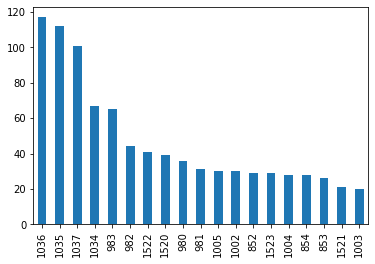

In [ ]:
df["LojaID"].value_counts(ascending= False).plot.bar()

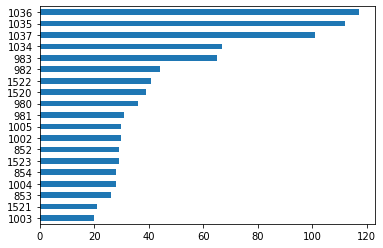

In [ ]:
df["LojaID"].value_counts(ascending= True).plot.barh();

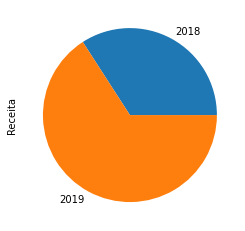

In [ ]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Total vendas')

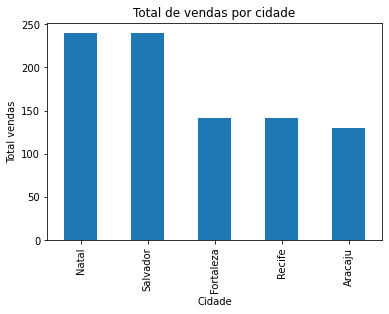

In [ ]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas")

Text(0, 0.5, 'Total vendas')

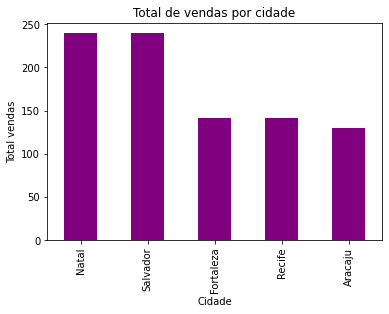

In [ ]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade",color="purple")
plt.xlabel("Cidade")
plt.ylabel("Total vendas")

In [ ]:
plt.style.use("ggplot")

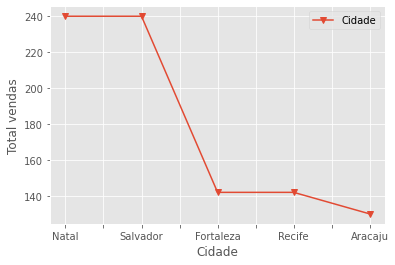

In [ ]:
df["Cidade"].value_counts().plot(marker = "v")
plt.xlabel("Cidade")
plt.ylabel("Total vendas")
plt.legend()

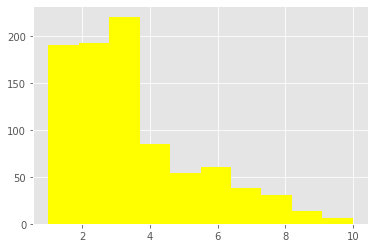

In [ ]:
plt.hist(df["Qtde"],color="yellow");

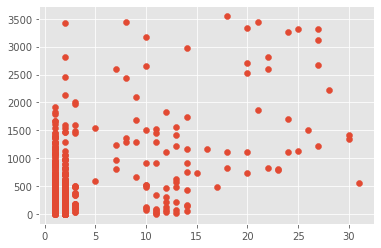

In [ ]:
plt.scatter(x = df["dia_venda"] ,y = df["Receita"]);

In [ ]:
df.head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_venda,dia_venda,Diferenca_dias,trimeste_vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1


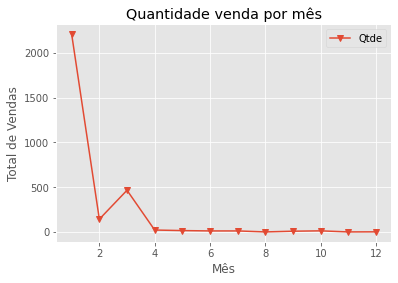

In [ ]:
df.groupby("mes_venda")["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade venda por mês")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.legend()
plt.savefig("grafico vendas.png")